# Basic Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import pickle
import matplotlib
import warnings
warnings.filterwarnings('ignore')
print('Numpy:',np.__version__)
print('Pandas:',pd.__version__)
print('Seaborn:',sns.__version__)
print('plotly:',plotly.__version__)
print('matplotlib:',matplotlib.__version__)

Numpy: 1.26.4
Pandas: 2.2.2
Seaborn: 0.13.2
plotly: 5.24.1
matplotlib: 3.10.0


**Machine Learning Libraries**

In [ ]:
# Model Selection & Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

from sklearn.linear_model import Ridge
import sklearn
# Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Sklearn:',sklearn.__version__)

Sklearn: 1.6.1


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Internship Project/Project 06 Rain Forcasting/rain_foreacastin_stand.csv')
df.head(10)

,year,jan,feb,mar,april,may,june,july,aug,sept,oct,nov,dec,total,post_monsoon,summer,winter,monsoon,classification,category
0,1901,0.0,-0.579769,0.0,1.869066,1.818838,0.492212,0.460078,0.332554,-1.275379,-0.836492,-0.698350,-0.585389,0.027046,-0.926378,1.903623,-0.808641,0.184819,1,2
1,1902,0.0,-0.579769,0.0,-0.578144,-0.619955,-1.080006,-1.225963,0.420999,1.990360,-0.552624,-0.645604,1.796576,-0.390071,-0.637595,-0.646056,0.960128,-0.275144,1,1
2,1903,0.0,-0.579769,0.0,-0.578144,1.818838,-0.588180,0.509535,0.568031,-0.228079,1.400632,-0.698350,-0.585389,0.661884,1.291743,1.787425,-0.808641,0.188691,1,3
3,1904,0.0,-0.579769,0.0,-0.578144,-0.705120,0.821969,-1.287607,-1.118124,-1.163322,-0.401097,-0.698350,-0.585389,-1.368592,-0.494682,-0.731035,-0.808641,-1.332714,1,0
4,1905,0.0,1.791204,0.0,-0.578144,-0.705120,-1.576946,-0.616820,-1.217445,-0.710599,-0.874363,1.829937,-0.585389,-2.048921,-0.612782,-0.731035,0.720633,-2.035227,0,0
5,1906,0.0,1.791204,0.0,-0.578144,-0.705120,-0.785166,0.165032,0.307979,-1.042319,-0.983731,-0.698350,-0.585389,-0.735786,-1.072365,-0.731035,0.720633,-0.555449,1,0
6,1907,0.0,1.791204,0.0,1.869066,-0.705120,0.456033,2.088473,0.001893,-1.349532,-0.867188,-0.698350,-0.585389,0.659627,-0.956813,-0.614838,0.720633,0.915489,1,3
7,1908,0.0,1.791204,0.0,-0.578144,-0.621136,-0.735759,0.492094,-0.074480,-0.486717,-0.690573,-0.698350,-0.585389,-0.473605,-0.781698,-0.647234,0.720633,-0.314715,1,1
8,1909,0.0,-0.579769,0.0,1.869066,-0.705120,0.504674,0.792839,-0.543553,1.095385,-0.985688,-0.698350,-0.585389,0.581655,-1.074307,-0.614838,-0.808641,0.870979,1,2
9,1910,0.0,-0.579769,0.0,-0.578144,0.026047,-0.199020,-1.645341,1.274798,-0.229045,0.215316,-0.140795,-0.585389,-0.535331,0.193932,-0.001461,-0.808641,-0.510341,1,1


# Machine Learning Model Bulidng

**Data Spliting**

In [ ]:
X = df[['jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']]
y = df['total']

**Feature Scaling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,jan,feb,mar,april,may,june,july,aug,sept,oct,nov,dec
12,0.0,1.596620,0.0,-0.578144,-0.705120,1.308349,0.414816,-1.183768,-0.722875,0.197584,-0.698350,-0.585389
15,0.0,-0.579769,0.0,0.400740,0.119118,-0.286655,-0.266490,0.673573,0.093626,1.413880,0.217423,-0.585389
115,0.0,-0.579769,0.0,-0.578144,-0.293870,0.251493,0.255641,0.328893,2.211948,0.255561,-0.698350,-0.585389
76,0.0,-0.579769,0.0,1.725286,-0.705120,-0.347688,1.251145,-0.955445,0.967565,-0.525382,1.829937,-0.585389
98,0.0,0.368620,0.0,-0.578144,1.818838,0.065588,-0.993475,-1.180520,0.275902,0.911351,-0.698350,-0.585389
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,-0.579769,0.0,-0.578144,1.818838,0.377220,0.169292,0.843248,1.007112,-0.977436,-0.698350,-0.585389
14,0.0,1.791204,0.0,0.455934,-0.233243,1.770652,-1.345453,-1.002715,-0.103055,0.401619,-0.687144,-0.585389
92,0.0,-0.579769,0.0,-0.578144,0.208294,-0.339549,-0.073692,-0.662942,2.425989,0.448225,0.172555,0.213527
51,0.0,-0.579769,0.0,-0.578144,-0.705120,0.567385,0.206371,-1.155530,-1.187863,-0.081763,-0.698350,-0.585389


In [ ]:
X_train.shape

(96, 12)

In [ ]:
y_train

,total
12,-0.044965
15,0.159580
115,1.142597
76,0.334499
98,-0.780966
...,...
106,1.195445
14,-0.378656
92,0.489259
51,-0.695192


In [ ]:
y_train.shape

(96,)

In [ ]:
y_test.shape

(25,)

**Evaluate Model**

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

**Model Running**

In [ ]:
models = {
    "Ridge": Ridge()
}

model_list = []
r2_list_test = []
cross_validation =[]
r2_list_train = []
after_cv_cross_validation =[]

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Cross-validation (5-fold)
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

    # Convert negative MAE scores to positive
    cv_mae_scores = -cv_mae_scores

    print(f"\nModel: {model_name}")
    model_list.append(model_name)

    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    r2_list_train.append(model_train_r2)

    print("\nModel performance for Test set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    r2_list_test.append(model_test_r2)

    print("\nCross-validation results (5-fold):")
    print(f"- Average R² Score: {cv_r2_scores.mean():.4f} (± {cv_r2_scores.std():.4f})")
    print(f"- Average MAE: {cv_mae_scores.mean():.4f} (± {cv_mae_scores.std():.4f})")
    cross_validation.append(cv_mae_scores.mean())
    after_cv_cross_validation.append(cv_r2_scores.mean())


    print("=" * 40)




Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1024
- Mean Absolute Error: 0.0747
- R2 Score: 0.9893

Model performance for Test set
- Root Mean Squared Error: 0.1011
- Mean Absolute Error: 0.0740
- R2 Score: 0.9907

Cross-validation results (5-fold):
- Average R² Score: 0.9812 (± 0.0025)
- Average MAE: 0.0912 (± 0.0135)


In [ ]:
pd.DataFrame(list(zip(model_list, r2_list_test,cross_validation,r2_list_train,after_cv_cross_validation)), columns=['Model Name', 'R2_Score Test','Cross Validation AVG MAE','R2 Score Train','after_cv_cross_validation']).sort_values(by=["R2_Score Test"],ascending=False)

,Model Name,R2_Score Test,Cross Validation AVG MAE,R2 Score Train,after_cv_cross_validation
0,Ridge,0.990652,0.091186,0.989254,0.981204


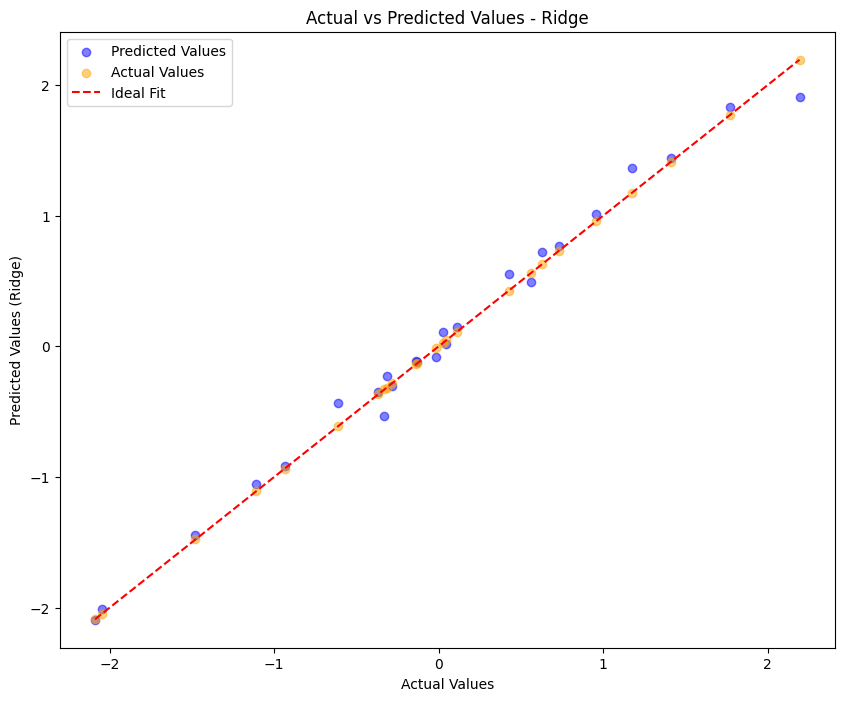

In [ ]:
# Predict only for Ridge
model_name = "Ridge"
y_test_pred = models[model_name].predict(X_test)

# Plot
plt.figure(figsize=(10, 8))

# Scatter plot with different colors
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Predicted Values", color="blue")  # Predicted in blue
plt.scatter(y_test, y_test, alpha=0.5, label="Actual Values", color="orange")  # Actual in orange

# Best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel(f"Predicted Values ({model_name})")
plt.title(f"Actual vs Predicted Values - {model_name}")

plt.legend()
plt.show()


#pickle

In [ ]:
with open('model.pkl','wb')as file:
  pickle.dump(model,file)

# Use SHAP Technique

In [ ]:
#!pip install shap

In [ ]:
import shap

model = Ridge()
model.fit(X_train, y_train)

explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/25 [00:00<?, ?it/s]

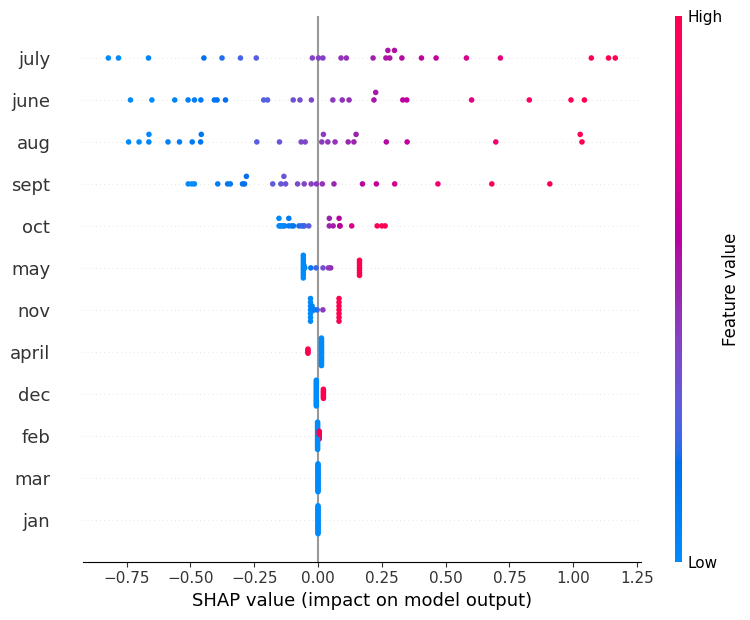

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

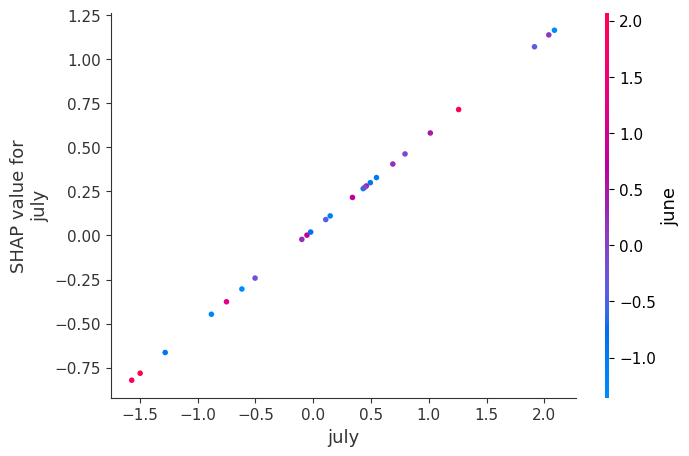

In [ ]:
shap.dependence_plot("july", shap_values, X_test)

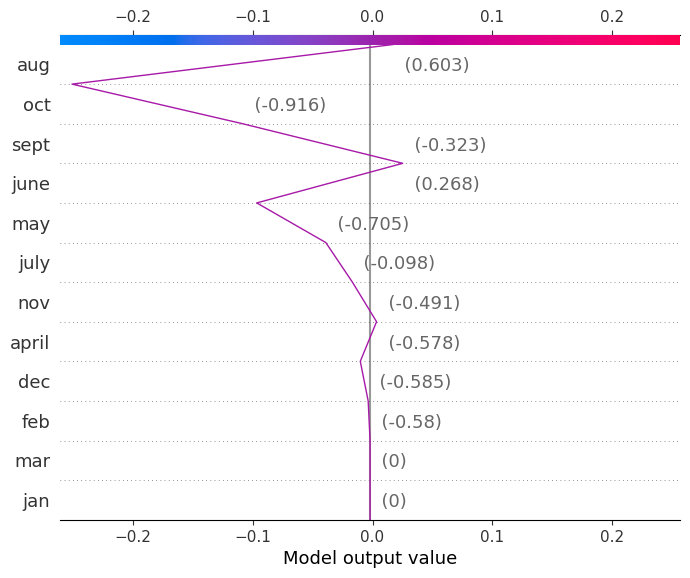

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])